**section 3**


Computer vision and convevolutional neural network

torch vision

List item
List item
torchvision.datasets-get datasets and data loading function for computer vision here torchvision.models-get pretrained computer vision models that can leverage your problem torchvision.transforms-functions for manipulating your vision data for ml model

torch.utils.data.dataset-base dataset for pytorch torch.util.data.dataloader-creates a python iterable over dataset

# computer vison libraries


In [ ]:

import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

In [ ]:
#we will be use FASIONMNIST

#setup training data
train_data = datasets.FashionMNIST(
    root="data",#where you want to download
    train=True,#do you want training dataset
    download=True,#do you eant to download
    transform=torchvision.transforms.ToTensor(),#do you want to convert to tensor
    target_transform=None #how do we transform label

)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [ ]:
#see the first training example

In [ ]:
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:

image.shape #color_chanel,height,width

class_names[label],image.shape

('Ankle boot', torch.Size([1, 28, 28]))

image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

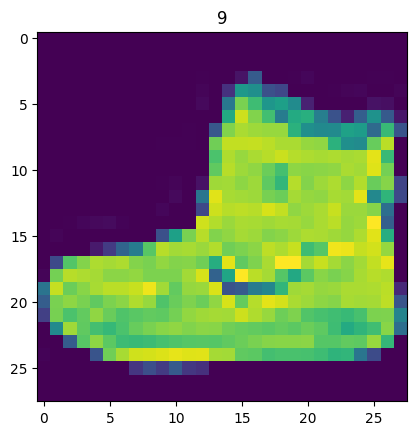

In [ ]:
import matplotlib.pyplot as plt

print(f"image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

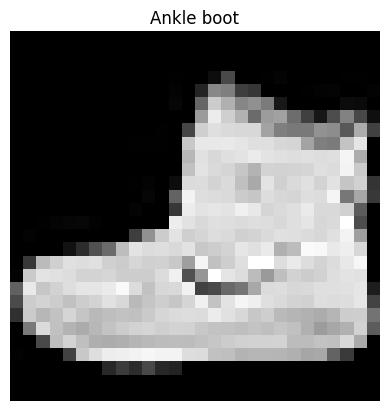

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)

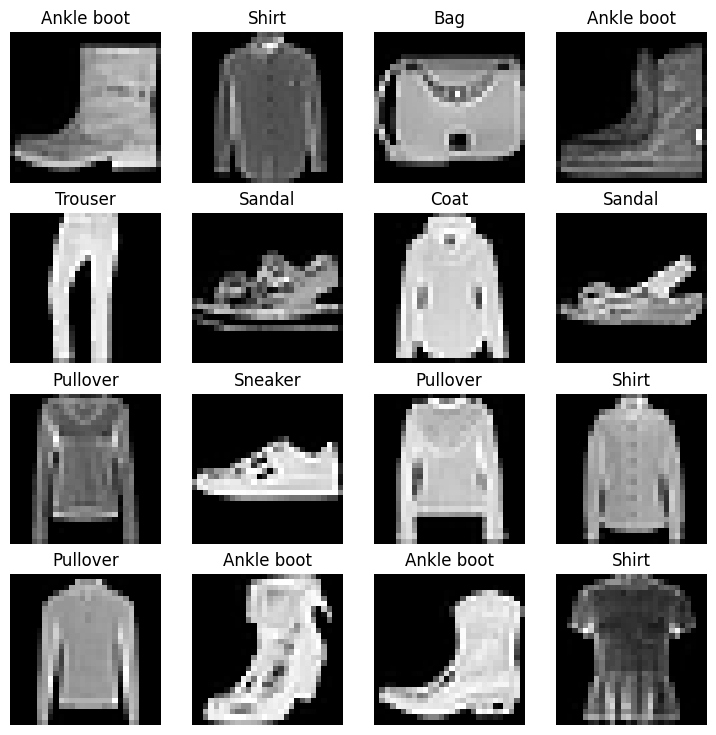

In [ ]:
#plot more images

torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows,cols = 4,4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img,label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [ ]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

right now our data is in the form of pytorch datasets


DAtaloader turns our dataset into a python iterable

more specifically we want to turn our data into batches or mini batches

we want to break 60000 images to batches

by creating batches it is more computable and hardware can look into it

In [ ]:
from torch.utils.data import DataLoader

#setup the batchsize hyperparameter

BATCH_SIZE = 32
train_loader = DataLoader(dataset=train_data,
                          batch_size=BATCH_SIZE,
                          shuffle=True)

Test_loader = DataLoader(dataset=test_data,
                         batch_size=BATCH_SIZE,
                         shuffle=False)

train_loader,Test_loader

(<torch.utils.data.dataloader.DataLoader at 0x799e71b64be0>,
 <torch.utils.data.dataloader.DataLoader at 0x799e71b64cd0>)

In [ ]:
train_features_batch,train_label_batch = next(iter(train_loader))
train_features_batch.shape,train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
len(train_loader),len(Test_loader)

(1875, 313)

(-0.5, 27.5, 27.5, -0.5)

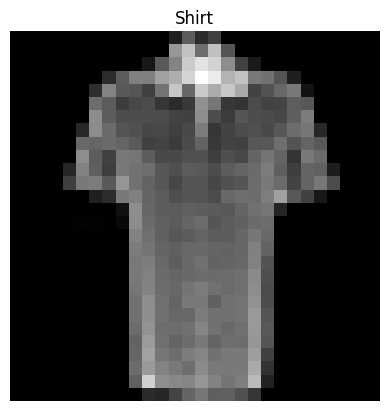

In [ ]:
torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img,label = train_features_batch[random_idx],train_label_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)

In [ ]:
#start with a baseline model
#baseline model is simple model.....start with simple and add complexity


#creating a flatten layer

flatten_model = nn.Flatten()

#get a single data

x = train_features_batch[0]
x.shape

#lets flatten the sample

output = flatten_model(x)
print(x.shape,output.shape)#x.shape ->color chanel,height,width
#output.shape->color chanel,width * height

torch.Size([1, 28, 28]) torch.Size([1, 784])


In [ ]:
#linear layer cant handle multi dimensional so we need to convert them to single dimensional

from torch import nn

class FASIONMNISTMODEL(nn.Module):
  def __init__(self,input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

model = FASIONMNISTMODEL(input_shape=784,#width * height 28*28
                         hidden_units=10,#no of hidden units
                         output_shape=len(class_names)#for every class
                         ).to("cpu")

model

FASIONMNISTMODEL(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand(1,1,28,28)
model(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [ ]:
#set loss optimizer evaluating function

#loss function will be crossEntropy
#optimizer-SGD
#evaluation metric-accuracy

In [ ]:
from pathlib import Path
import requests


if Path("helper_function.py").is_file():
    print("file already exist")
else:
    print("downloading helper function")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_function.py","wb") as f:
        f.write(request.content)

file already exist


In [ ]:
from helper_function import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.1)

In [ ]:
#to time our experiment

from timeit import default_timer as timer

def print_time(start:float,
               end:float,
               device:torch.device=None):

  """print difference"""

  total_time = end - start

  print(f"train time on {device}:{total_time:.3f} seconds")

In [ ]:
start_time = timer()

####
###
##
end_time = timer()
print_time(start=start_time,
           end=end_time,
           device="cpu")

train time on cpu:0.000 seconds


In [ ]:
#creating a training loop
#loop through epoch
#loop through training batches calculate train loss per batch
#loop through test loss calculate test loss per batch
#print the result

from tqdm.auto import tqdm

torch.manual_seed(42)

train_time_start_on_cpu = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"epoch:{epoch}\n---------")
  train_loss = 0
  for batch, (X,y) in enumerate(train_loader):
    model.train()
    y_pred = model(X)
    loss = loss_fn(y_pred,y)
    train_loss += loss #acccumalate train loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 400 == 0:
      print(f"looked at{batch * len(X)} / {len(train_loader.dataset)} samples")

  #divide total train loss by length of train loader
  train_loss /= len(train_loader)

  #testing loop
  test_loss,test_acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X_test,y_test in Test_loader:
      test_pred = model(X_test)
      test_loss += loss_fn(test_pred,y_test)
      test_acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))

    #calculate the test loss
    test_loss /= len(Test_loader)
    test_acc /= len(Test_loader)
  print(f"\n trainloss:{train_loss:.4f} | testloss:{test_loss:.4f} | test acc:{test_acc:.4f}%")

train_time_end_cpu = timer()

total_cpu = print_time(start=train_time_start_on_cpu,
                       end=train_time_end_cpu,
                       device=str(next(model.parameters()).device))




  0%|          | 0/3 [00:00<?, ?it/s]

epoch:0
---------
looked at0 / 60000 samples
looked at12800 / 60000 samples
looked at25600 / 60000 samples
looked at38400 / 60000 samples
looked at51200 / 60000 samples

 trainloss:0.5904 | testloss:0.5095 | test acc:82.0387%
epoch:1
---------
looked at0 / 60000 samples
looked at12800 / 60000 samples
looked at25600 / 60000 samples
looked at38400 / 60000 samples
looked at51200 / 60000 samples

 trainloss:0.4763 | testloss:0.4799 | test acc:83.1969%
epoch:2
---------
looked at0 / 60000 samples
looked at12800 / 60000 samples
looked at25600 / 60000 samples
looked at38400 / 60000 samples
looked at51200 / 60000 samples

 trainloss:0.4550 | testloss:0.4766 | test acc:83.4265%
train time on cpu:45.144 seconds


In [ ]:
torch.manual_seed(42)

def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X_test,y_test in tqdm(data_loader):
      y_pred_new = model(X_test)

      loss += loss_fn(y_pred_new,y_test)
      acc += accuracy_fn(y_true=y_test,
                         y_pred=y_pred_new.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model name":model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc":acc}

model_result = eval_model(model=model,
                          data_loader=Test_loader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn)

model_result


  0%|          | 0/313 [00:00<?, ?it/s]

{'model name': 'FASIONMNISTMODEL',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
from torch.nn.modules.activation import ReLU
#building a better model with non-linearity
import torch.nn as nn

class FASIONMNISTMODELV1(nn.Module):
  def __init__(self,input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )
  def forward(self,x:torch.tensor):
    return self.layer_stack(x)



In [ ]:
torch.manual_seed(42)

model_1 = FASIONMNISTMODELV1(input_shape=784,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
train_loss = 0
test_loss = 0
test_acc = 0

In [ ]:
#create training function

def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim,
               accuracy_fn,
               device:torch.device=device):
  train_loss,train_acc = 0,0
  model.train()
  for batch,(X,y) in enumerate(data_loader):
    X,y = X.to(device),y.to(device)

    y_pred = model(X)
    loss = loss_fn(y_pred,y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"train_loss:{train_loss:.5f} | train_acc:{train_acc:.2f}%")





In [ ]:
def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device=device):

  test_loss,test_acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X,y = X.to(device),y.to(device)

      test_pred = model(X)
      test_loss += loss_fn(test_pred,y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"test_loss:{test_loss:.5f} | test_acc:{test_acc:.2f}%")


In [ ]:
torch.manual_seed(42)

train_time_start_gpu = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"epoch:{epoch}\n-----------")
  train_step(model=model_1,
             data_loader=train_loader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
             data_loader=train_loader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)
train_time_end_gpu = timer()

total_train_time = print_time(start=train_time_start_gpu,
                              end=train_time_end_gpu,
                              device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

epoch:0
-----------
train_loss:0.66768 | train_acc:75.88%
test_loss:0.46911 | test_acc:83.00%
epoch:1
-----------
train_loss:0.48266 | train_acc:82.67%
test_loss:0.44532 | test_acc:84.24%
epoch:2
-----------
train_loss:0.44946 | train_acc:83.77%
test_loss:0.43216 | test_acc:85.06%
train time on cuda:45.391 seconds


In [ ]:
!nvidia-smi

Thu Aug 10 16:04:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    31W /  70W |   1125MiB / 15360MiB |      3%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
torch.manual_seed(42)

def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device=device):
  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X_test,y_test in tqdm(data_loader):
      X_test,y_test = X_test.to(device),y_test.to(device)
      y_pred_new = model(X_test)

      loss += loss_fn(y_pred_new,y_test)
      acc += accuracy_fn(y_true=y_test,
                         y_pred=y_pred_new.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model name":model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc":acc}

In [ ]:
model_results_1 = eval_model(model=model_1,
                             data_loader=Test_loader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_results_1

  0%|          | 0/313 [00:00<?, ?it/s]

{'model name': 'FASIONMNISTMODELV1',
 'model_loss': 0.47525647282600403,
 'model_acc': 83.58626198083067}

In [ ]:
#Building CNN(convolutional neural network)
class FASIONMNISTMODEL2(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    #create a conv layer
    self.conv_blk1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),#value we can set in cnn kernalsize:
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_blk2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=(hidden_units * 49),#trick to calculate this
                  out_features=output_shape)
    )

  def forward(self,x):
    x = self.conv_blk1(x)
    #print(x.shape)
    x = self.conv_blk2(x)
    #print(x.shape)
    x = self.classifier(x)
    #print(x.shape)
    return x

In [ ]:
torch.manual_seed(42)

model_3 = FASIONMNISTMODEL2(input_shape=1,
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)

In [ ]:
model_3.state_dict()

OrderedDict([('conv_blk1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
         

In [ ]:
torch.manual_seed(42)

images = torch.randn(size=(32,3,64,64))
test_image = images[0]
print("images shape:",images.shape)
print("test images shape:",test_image.shape)
print("test image:\n",test_image)


images shape: torch.Size([32, 3, 64, 64])
test images shape: torch.Size([3, 64, 64])
test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,

In [ ]:
#create single conv layer

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

#pass the data through this layer

conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

In [ ]:
#create a maxpool2d

print(f"test image shape:{test_image.shape}")
print(f"test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")
max_pool = nn.MaxPool2d(kernel_size=2)
max_output = max_pool(conv_output)

max_output.shape



test image shape:torch.Size([3, 64, 64])
test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])


torch.Size([10, 31, 31])

In [ ]:
rand_image = torch.randn(size=(1,28,28))
rand_image.shape

torch.Size([1, 28, 28])

In [ ]:
model_3(rand_image.unsqueeze(0).to(device))

tensor([[ 0.0426, -0.0984,  0.0621, -0.0358,  0.0184,  0.0271,  0.0163,  0.0133,
         -0.0038, -0.0115]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
model_3(image.unsqueeze(0).to(device))

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
#loss function and optimizer for cnn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

In [ ]:
epochs = 3

torch.manual_seed(42)
torch.cuda.manual_seed(42)
start_time = timer()
for epoch in tqdm(range(epochs)):
  print(f"epoch:{epoch}\n----------")
  train_step(model=model_3,
             data_loader=train_loader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_3,
            data_loader=Test_loader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
  end_time = timer()

  total_time = print_time(start=start_time,
                          end=end_time,
                          device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

epoch:0
----------
train_loss:0.59475 | train_acc:78.36%
test_loss:0.39507 | test_acc:85.67%
train time on cuda:13.563 seconds
epoch:1
----------
train_loss:0.36141 | train_acc:86.96%
test_loss:0.35578 | test_acc:86.52%
train time on cuda:27.001 seconds
epoch:2
----------
train_loss:0.32477 | train_acc:88.27%
test_loss:0.31341 | test_acc:88.73%
train time on cuda:38.680 seconds


In [ ]:
model_3_results = eval_model(
    model=model_3,
    data_loader=Test_loader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_3_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model name': 'FASIONMNISTMODEL2',
 'model_loss': 0.3134094178676605,
 'model_acc': 88.72803514376997}

In [ ]:
import pandas as pd

compare_results = pd.DataFrame({
    "model_1_result":model_result,
    "model_2_result":model_results_1,
    "model_3_result":model_3_results
})

compare_results

,model_1_result,model_2_result,model_3_result
model name,FASIONMNISTMODEL,FASIONMNISTMODELV1,FASIONMNISTMODEL2
model_loss,0.476639,0.475256,0.313409
model_acc,83.426518,83.586262,88.728035


In [ ]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     devic:torch.device=device):
  pred_probs = []

  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample,dim=0).to(device)
      #forward pass
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)

      #matplotlib dont work on gpu

      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)


In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[7]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

Text(0.5, 1.0, 'Sandal')

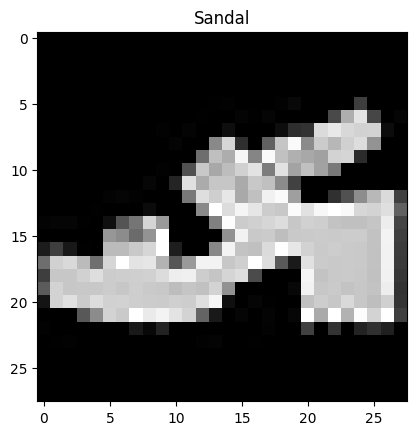

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
#make predictions

pred_probs = make_predictions(model=model_3,
                              data=test_samples)

pred_probs[:2]

pred_classes = pred_probs.argmax(dim=1)

pred_classes


tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

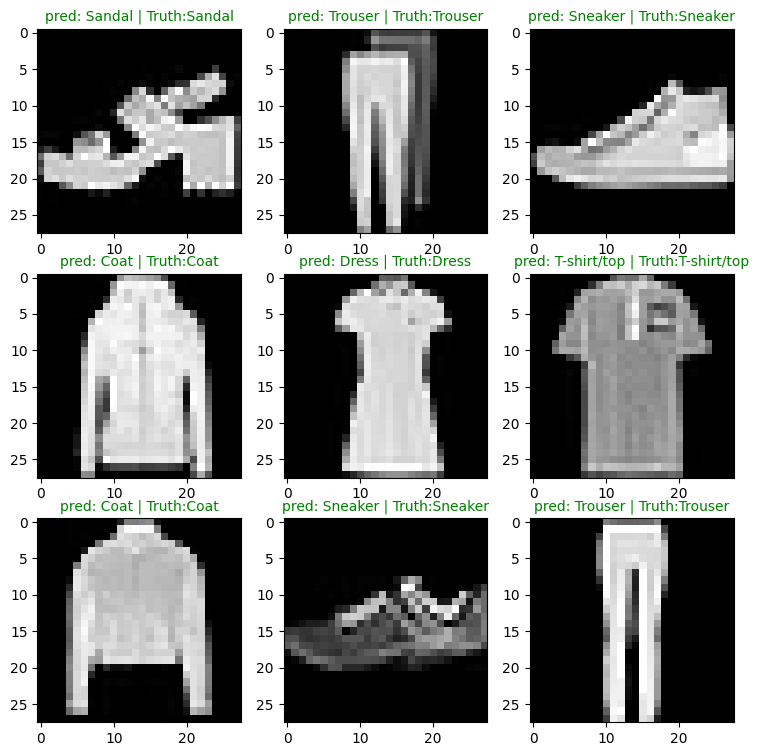

In [ ]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i,sample in enumerate(test_samples):
  plt.subplot(nrows,ncols,i+1)
  plt.imshow(sample.squeeze(),cmap="gray")
  #find prediction (in text form)
  pred_label = class_names[pred_classes[i]]
  #get the truth label
  truth_label = class_names[test_labels[i]]

  #create title
  title_text = f"pred: {pred_label} | Truth:{truth_label}"

  if pred_label == truth_label:
    plt.title(title_text,fontsize=10,c="g")
  else:
    plt.title(title_text,fontsize=10,c="r")

  #plt.axis(False)



In [ ]:
torch.save(model_3,'model_architecture.pth')
torch.save(model_3.state_dict(), 'model_parameters.pth')

In [ ]:
from PIL import